<a href="https://colab.research.google.com/github/mharrisonbaker/DATA620/blob/main/DATA620_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matthew Baker
## DATA 620 HW 1


In [ ]:
!pip uninstall networkx -y &> /dev/null
!pip install  networkx==1.11 &> /dev/null
import networkx as nx
print(nx.__version__)

1.11


In [ ]:
!pip uninstall matplotlib -y &> /dev/null
!pip install matplotlib==2.2.3 &> /dev/null
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

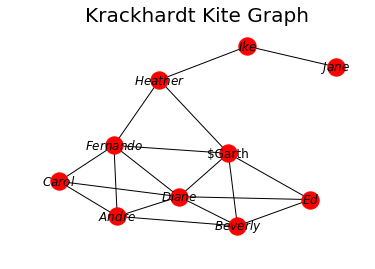

In [ ]:
#create graph
G=nx.krackhardt_kite_graph()

#positions for all nodes, layout ensures they will be nicely distributed
pos=nx.spring_layout(G)

#draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)

# names labels
labels = {}
labels[0] = r"$Andre$"
labels[1] = r"$Beverly$"
labels[2] = r"$Carol$"
labels[3] = r"$Diane$"
labels[4] = r"$Ed$"
labels[5] = r"$Fernando$"
labels[6] = r"$Garth"
labels[7] = r"$Heather$"
labels[8] = r"$Ike$"
labels[9] = r"$Jane$"
#add labels to nodes
nx.draw_networkx_labels(g, pos, labels) 

plt.axis("off")
plt.title("Krackhardt Kite Graph", fontsize=20)
plt.show()